# Definitions 

## Single Factor Experiments

Experiments in which only a single factor varies while all others are kept constant are called single-factor experiments. The treatmens consist solely of the different levels of the single vactor. All other factors are applied uniformly to all plots at a single prescribed level.

For example, most crop variety and the factor levels (i.e. treatments) are the different varieties. Only the variety planted differes from one experiment plot to another and all management factors are applied uniformly to all plots. Other examples of single-factor experiment are:
- Fertilizer trials where several rates of a single fertilizer element are tested.
- Insecticide trials where several insecticides are tested.
- Plant-population trials where several plant densities are tested.

## Completely Randomized Design (CRD) 

- CRD is one assigned completely at random so that each experimental unit has the same chance of receiving any one treatment. 
- Any difference among experimental units receiving the same treatment is considered as experimental error. 
- CRD is only appropriate for experiments with homogeneous experimental units, such as laboratory experiments, where environmental effects are relatively easy to control. For field experiments, where there is generally large variation among experimental plots, in such environmental factors as soil, the CRD is rarely used.

## Analysis of Variance

Suppose that we have *a* different levels of a single factor that we wish to compare.

The level of factor are sometimes called **treatments**.

The response for each of the *a* treatments is a random varianle which has *n* observations or **replicants**.

See Table below to see a typical data representation for single-factor experiment

![Fig 01](<figs/Fig01 Single Factor Experiment..jpg>)

We may describe the observations in Table above by the linear statistical model

![Fig 02](<figs/Fig02 LinReg of ANOVA.jpg>)
- yij is a random variable denoting the (ij) th observation
- μ is a parameter common to all treatments called the overall mean 
- τi is a parameter associated with the ith treatment called the ith treatment effect, 
- eij is a random error component.

Furthermore, because we require that the observations are taken in random order and that the environment (often called the experimental units) in which the treatments are used is as uniform as possible, this experimental design is called a completely randomized design (CRD).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f
import statsmodels.formula.api as smf
import statsmodels.api as sm


# Dataset for One-way ANOVA

An experiment on chemical control of brown planthoppers and stem borers in rice. The dataset repsresents grain yield of rice resulting from use of different follar and granular insecticides  for the control of brown planthoppers and stem borers, from a CRD experinment with 4 replications (r) and 7 treatments (t).

In [2]:
# load data file
df = pd.read_csv('dataset/dataset1.csv')
print(df.head())

   Control  DolMix_1kg  DolMix_2kg  DDT_yBHC  Azodrin  Dimecron_Boom  \
0    1.401       2.537       3.366     2.536    2.387          1.997   
1    1.516       2.064       2.591     2.459    2.453          1.679   
2    1.270       2.104       2.211     2.827    1.556          1.904   
3    1.077       1.797       2.544     2.385    2.116          1.320   

   Dimecron_Knap  
0          1.796  
1          1.704  
2          1.904  
3          1.320  


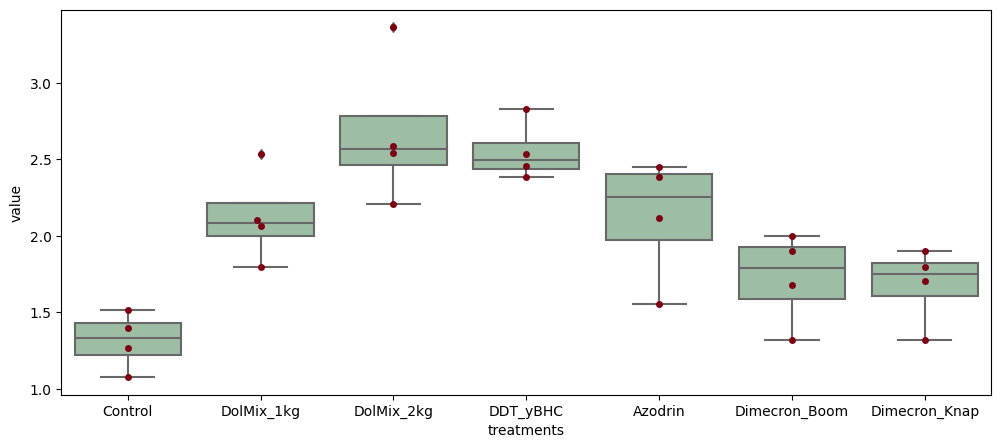

In [4]:
# reshape the d dataframe suitable for statsmodels package 
value_vars = ['Control', 'DolMix_1kg', 'DolMix_2kg', 'DDT_yBHC', 'Azodrin', 'Dimecron_Boom', 'Dimecron_Knap']
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=value_vars)

# Replace column names
df_melt.columns=['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences between different treatments
ax = plt.figure(figsize=(12, 5))
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='treatments', y='value', data=df_melt, color='#7d0013')
plt.show()

Figure above presents box plots of grain yield (kg/ha) at the seven experiments. This figure indicates that different follar and granular insecticides  for the control of brown planthoppers and stem borers has an effect on grain yield.

Graphical interpretation of the data is always useful. Box plots show the variability of the 
observations within a treatment (factor level) and the variability between treatments. We now 
discuss how the data from a single-factor randomized experiment can be analyzed statistically

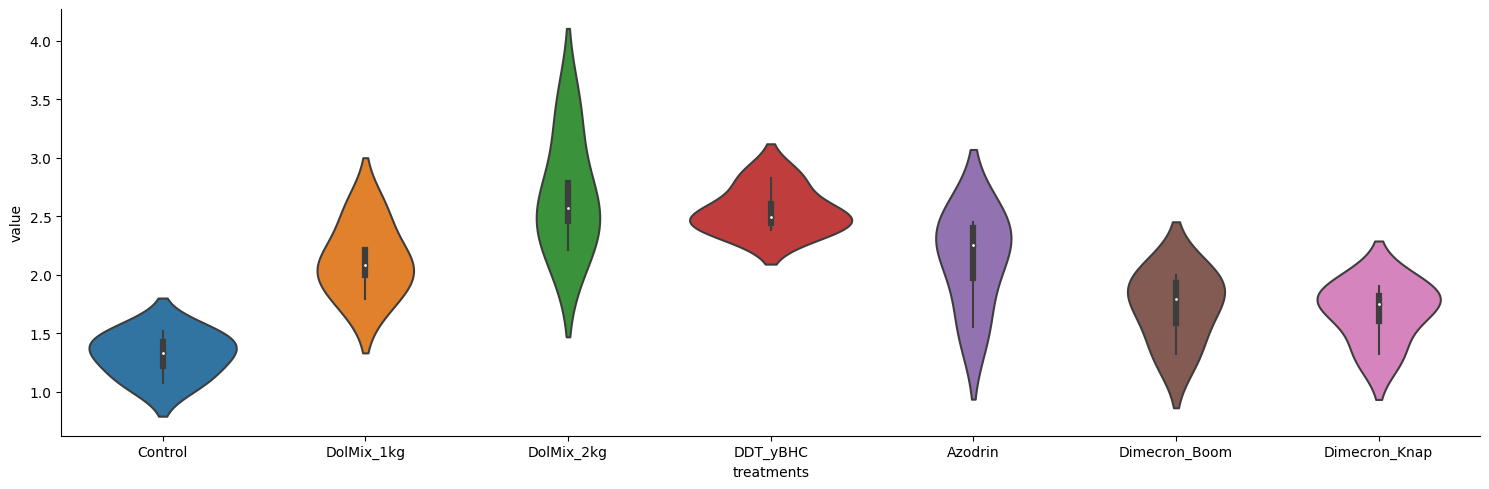

In [5]:
# or
sns.catplot(x="treatments", y="value", data=df_melt, dodge=True, kind='violin', aspect=3)
plt.show()

In [6]:
# Drop rows that contain missing data and update the DataFrame.
df_melt = df_melt.dropna(axis=0)

# Confirm the data contain no missing values
df_melt.isnull().sum(axis=0) 

index         0
treatments    0
value         0
dtype: int64

# Run ANOVA

**ANOVA effect table**

The ANOVA table represents between- and within-group sources of variation, and their associated degree of freedoms, the sum of squares (SS), and mean squares (MS). The total variation is the sum of between- and within-group variances. The F value is a ratio of between- and within-group mean squares (MS). p value is estimated from F value and degree of freedoms.

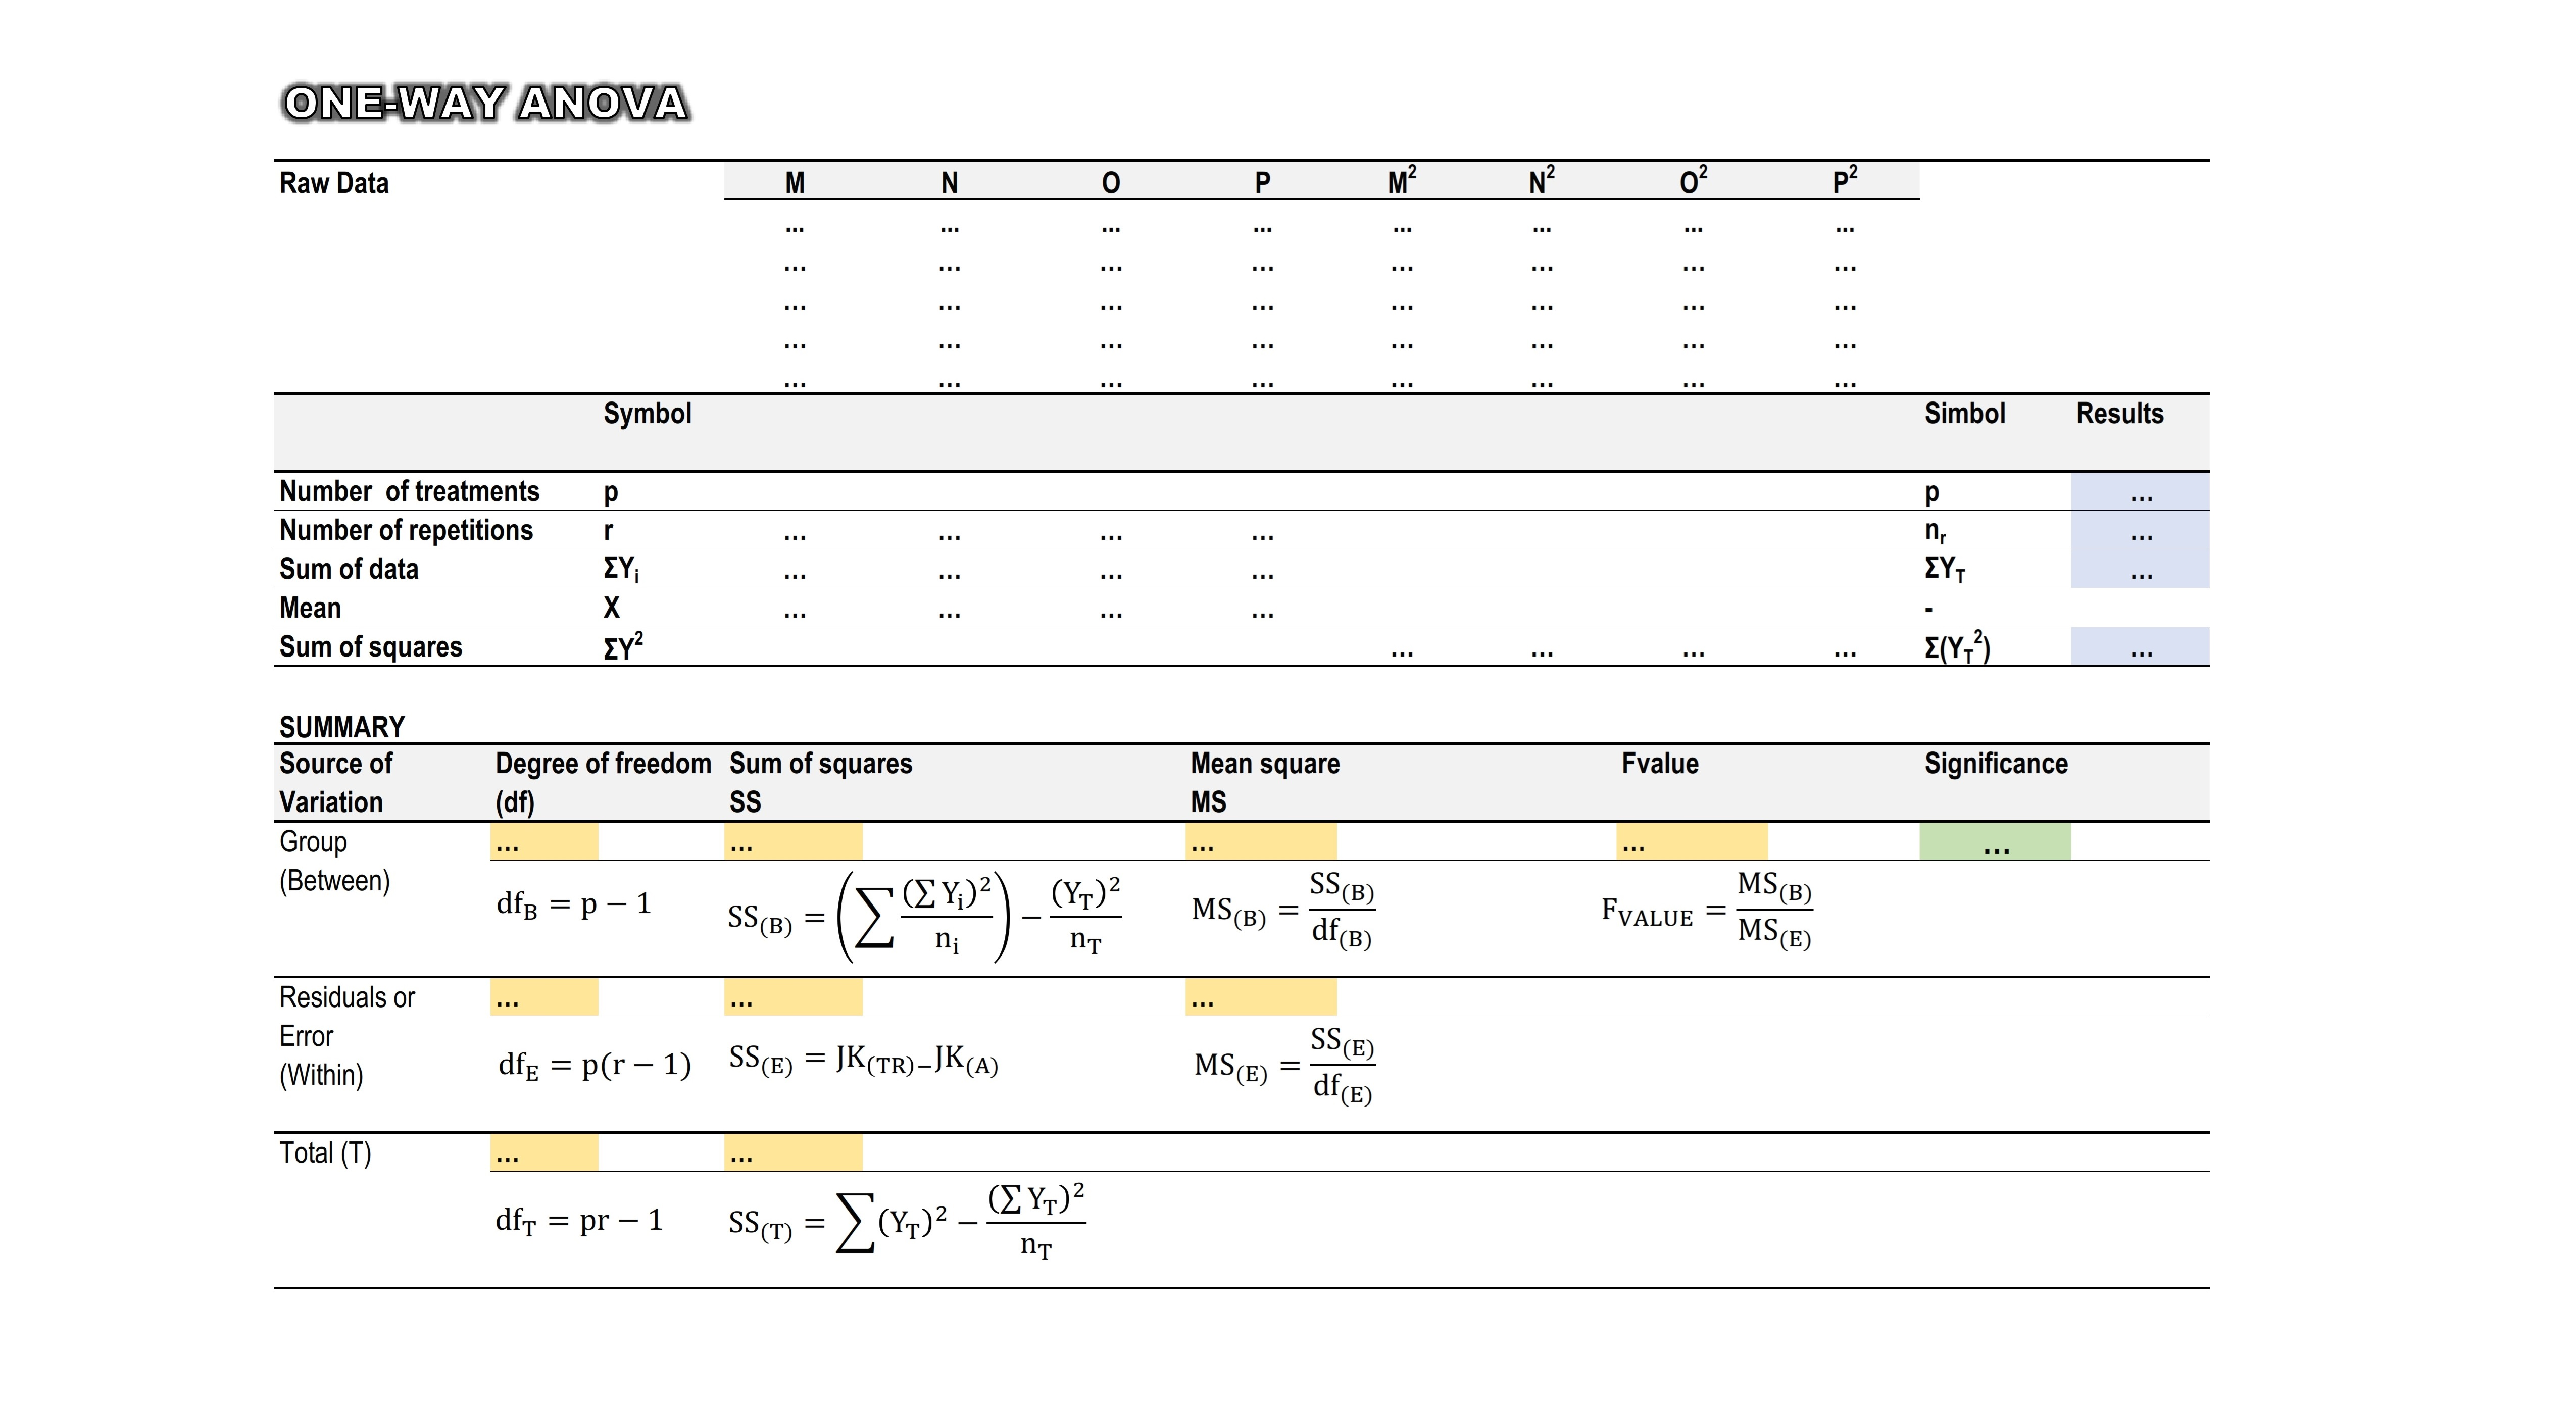

## ANOVA from Scratch 

In [24]:
"""Number of treatments"""
p = df.shape[1] #m

"""Number of observations (repetitions)"""
r = df.shape[0] #n

"""Degree of freedom (df)"""
df_b = p - 1
df_e = p*(r - 1)
df_t = p*r - 1

reps = 4 # The number of repetitions of A along each axis

"""Sum of Squares (SS)"""
SS_b = np.sum(np.sum((np.tile(np.mean(df, axis=0), (reps,1)) - np.mean(np.mean(df, axis=0)))**2))
SS_e = np.sum(np.sum((df - np.mean(df, axis=0))**2))
SS_t = np.sum(np.sum((df - np.mean(np.mean(df, axis=0)))**2))

"""Mean Square (MS)"""
MS_b = SS_b/df_b
MS_e = SS_e/df_e

"""F value"""
F = MS_b/MS_e
print(F)

"""Level of significance"""
alpha = 0.05
"""Confidence intervals"""
CIs = 0.95

f.ppf(CIs, dfn=df_b, dfd=df_e)

"""P value"""
p_value = (1 - f.cdf(F, dfn=df_b, dfd=df_e))*2
print(p_value)

"""Hypothesis Test"""
if p_value < 0.05:
    print('Reject H_0: there are insignificant differences among treatments')
else:
    print('Accept H_0: there are significant differences among treatments')

9.204547705588036
0.00010652852750747677
Reject H_0: there are insignificant differences among treatments


## ANOVA using scipy.stats

In [18]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Control'], df['DolMix_1kg'], df['DolMix_2kg'], df['DDT_yBHC'], df['Azodrin'], df['Dimecron_Boom'], df['Dimecron_Knap'])

print(fvalue, pvalue)

"""Hypothesis Test"""
if pvalue < 0.05:
    print('Reject H_0: there are insignificant differences among treatments')
else:
    print('Accept H_0: there are significant differences among treatments')

9.204547705588029 5.3264263753791685e-05
Reject H_0: there are insignificant differences among treatments


## Perform three steps to conduct ANOVA using OLS

In [19]:
"""Step 1: Generate a model that fits our model"""
model = smf.ols(formula='value ~ treatments', data = df_melt)

"""Step 2: Fit our data to the model to obtain parameter estiamtes"""
model = model.fit()

"""Step 3: Derive the statistics using a summary function of the model fit"""
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     9.205
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           5.33e-05
Time:                        09:04:12   Log-Likelihood:                -4.0113
No. Observations:                  28   AIC:                             22.02
Df Residuals:                      21   BIC:                             31.35
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [20]:
# Show ANOVA table 
anova_table = sm.stats.anova_lm(model, typ=2)
print('\nANOVA table\n',anova_table)

# Show ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ treatments')
res.anova_summary


ANOVA table
               sum_sq    df         F    PR(>F)
treatments  5.741880   6.0  9.204548  0.000053
Residual    2.183332  21.0       NaN       NaN


,df,sum_sq,mean_sq,F,PR(>F)
treatments,6.0,5.741880,0.956980,9.204548,0.000053
Residual,21.0,2.183332,0.103968,NaN,NaN


In [21]:
"""Compare p-value of f_oneway analysis"""
F, p = stats.f_oneway(df_melt[df_melt['treatments'] == 'Control'].value,
                      df_melt[df_melt['treatments'] == 'DolMix_1kg'].value,
                      df_melt[df_melt['treatments'] == 'DolMix_2kg'].value,
                      df_melt[df_melt['treatments'] == 'DDT_yBHC'].value,
                      df_melt[df_melt['treatments'] == 'Dimecron_Boom'].value,
                      df_melt[df_melt['treatments'] == 'Dimecron_Knap'].value)
print(p)

2.921672355447487e-05


In [22]:
if pvalue < 0.05:
    print('there are significant differences among treatments')
else:
    print('there are insignificant differences among treatments')

there are significant differences among treatments


# Post Hoc tests

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using several techniques.

## Tukey’s honestly significantly differenced (HSD) Test

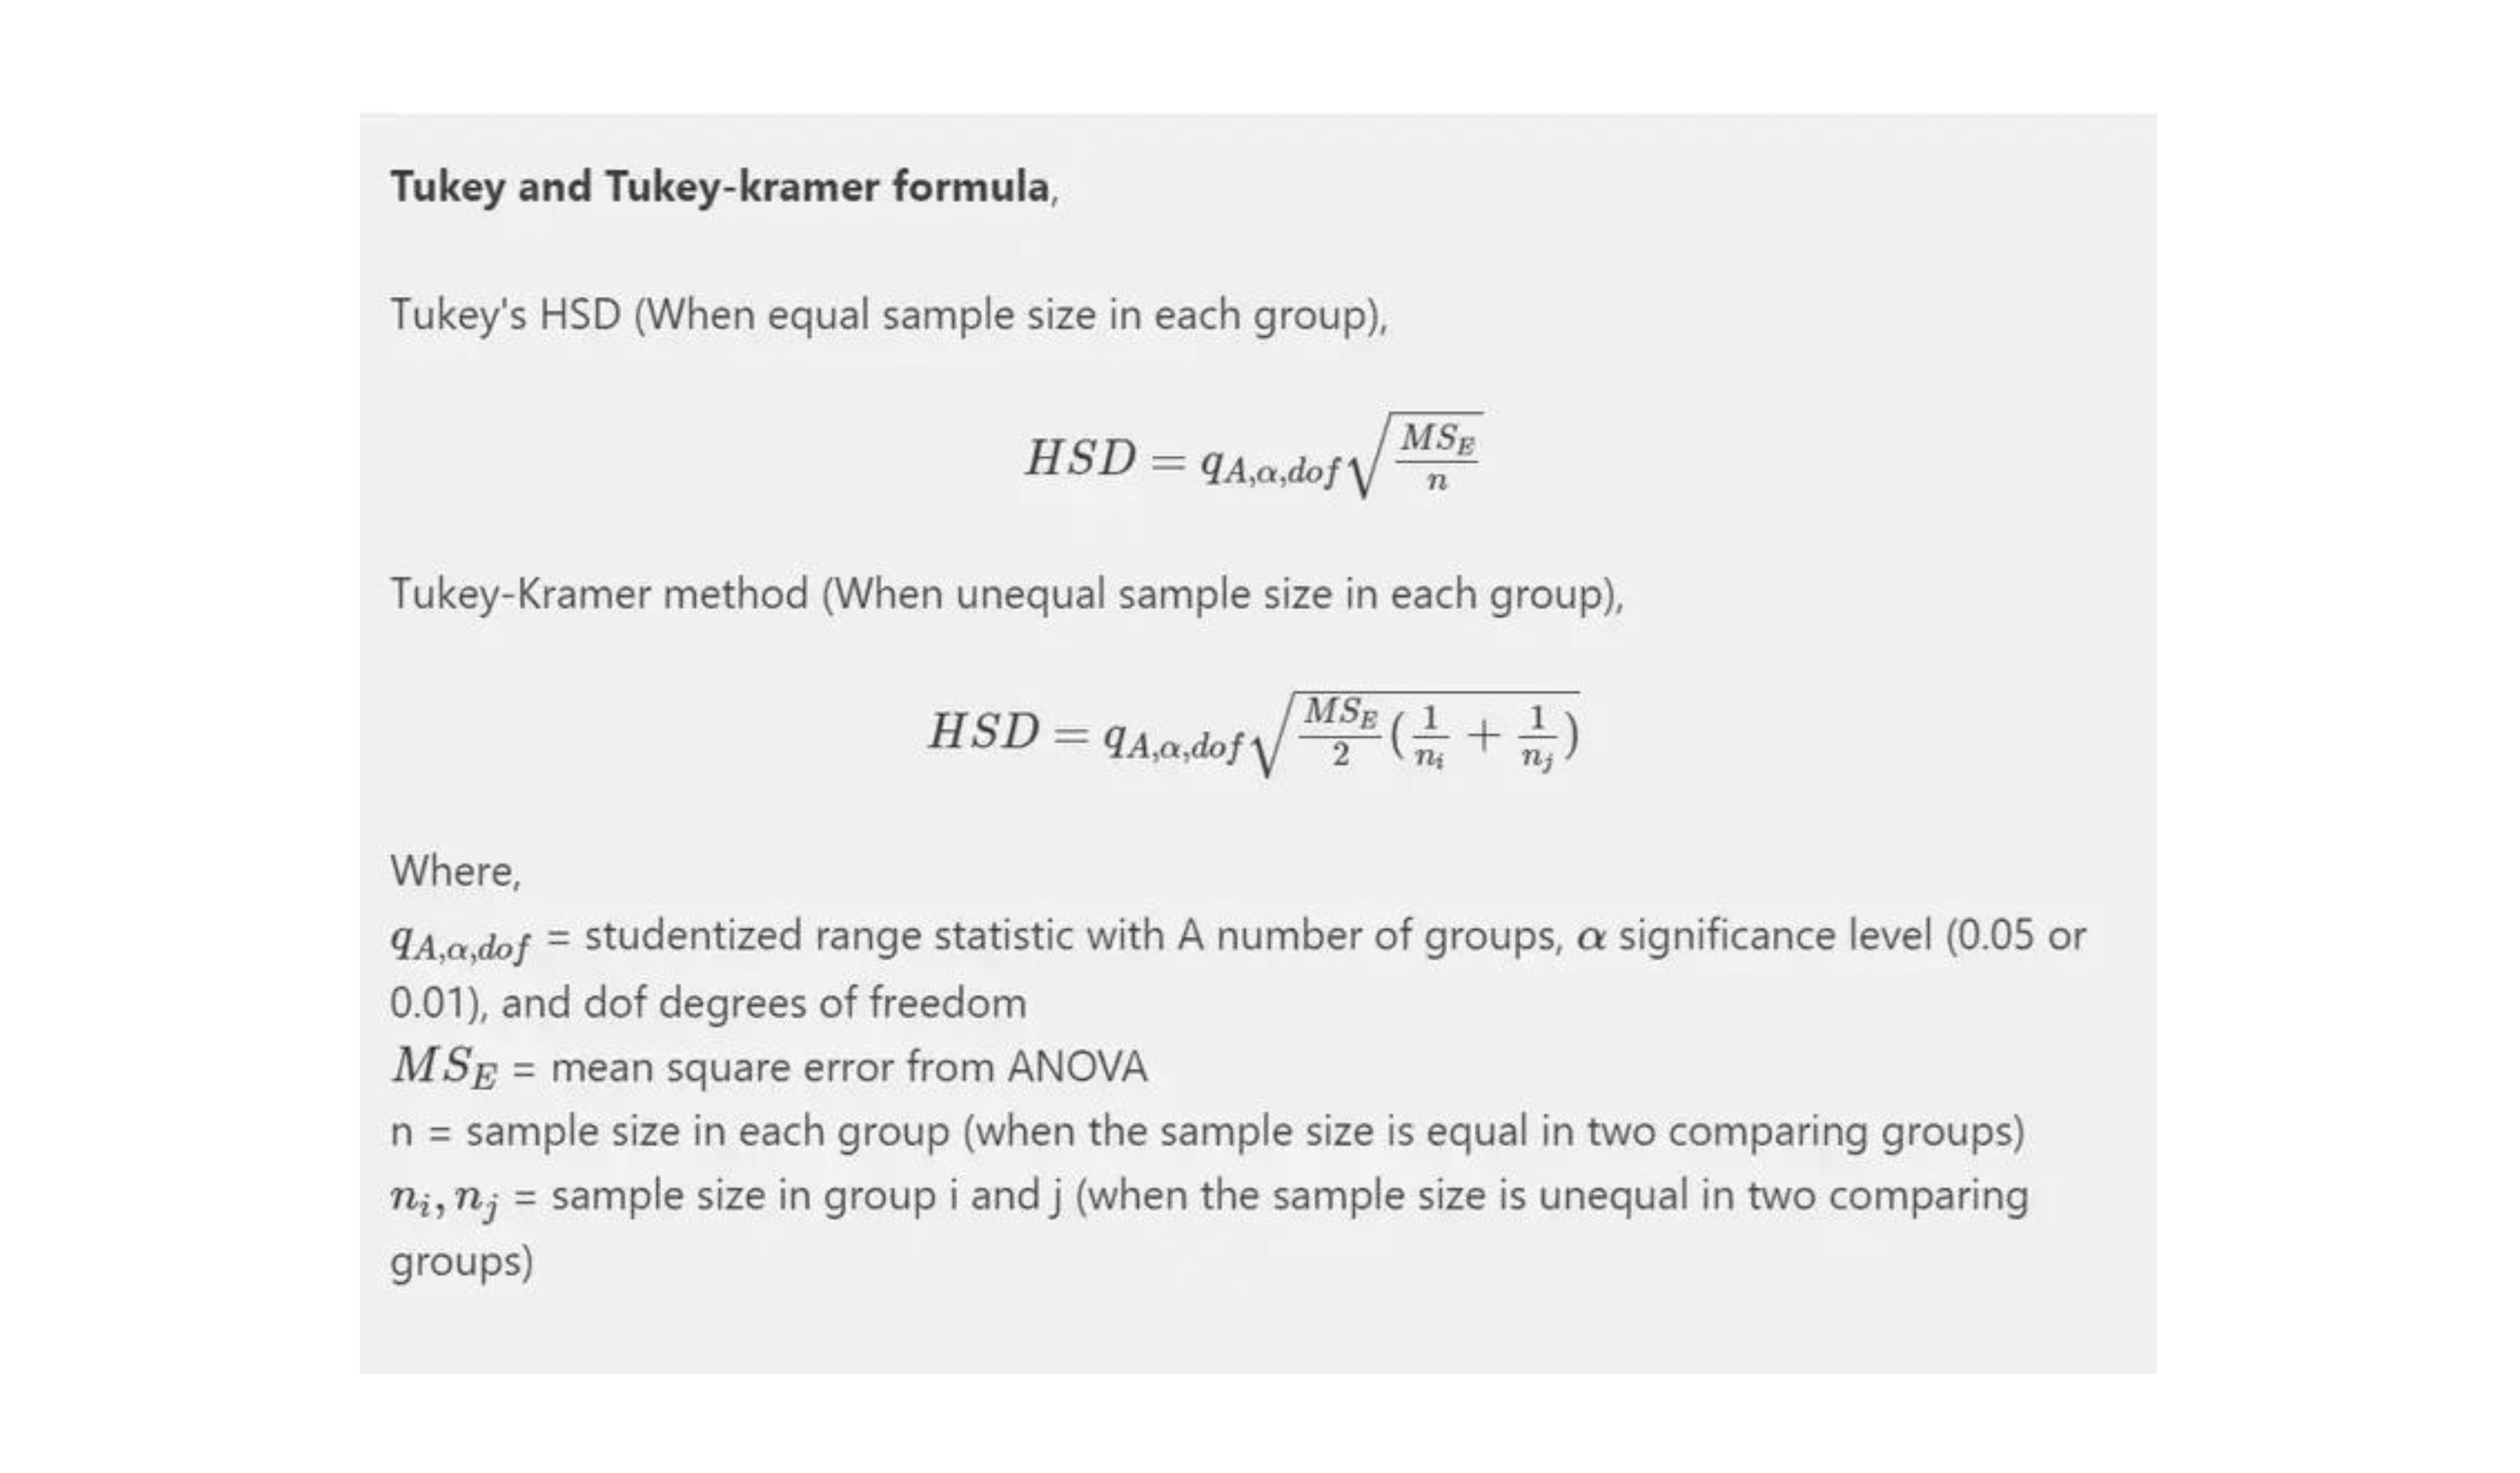

In [25]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ treatments')
res.tukey_summary

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Control,DolMix_1kg,0.80950,0.068293,1.550707,5.021074,0.026493
1,Control,DolMix_2kg,1.36200,0.620793,2.103207,8.448058,0.001000
2,Control,DDT_yBHC,1.23575,0.494543,1.976957,7.664969,0.001000
3,Control,Azodrin,0.81200,0.070793,1.553207,5.036581,0.025873
4,Control,Dimecron_Boom,0.40900,-0.332207,1.150207,2.536898,0.558494
5,Control,Dimecron_Knap,0.36500,-0.376207,1.106207,2.263980,0.662714
6,DolMix_1kg,DolMix_2kg,0.55250,-0.188707,1.293707,3.426984,0.237572
7,DolMix_1kg,DDT_yBHC,0.42625,-0.314957,1.167457,2.643895,0.517635
8,DolMix_1kg,Azodrin,0.00250,-0.738707,0.743707,0.015507,0.900000
9,DolMix_1kg,Dimecron_Boom,0.40050,-0.340707,1.141707,2.484176,0.578631


Above results from Tukey’s HSD suggests that pairwise comparisons for treatments rejects null hypothesis (p < 0.05) indicates statistical significant differences.

# Test ANOVA assumptions

ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.

The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes (say n > 50). For large sample sizes, you should consider to use QQ-plot for normality assumption.

## QQ-plot and Histogram

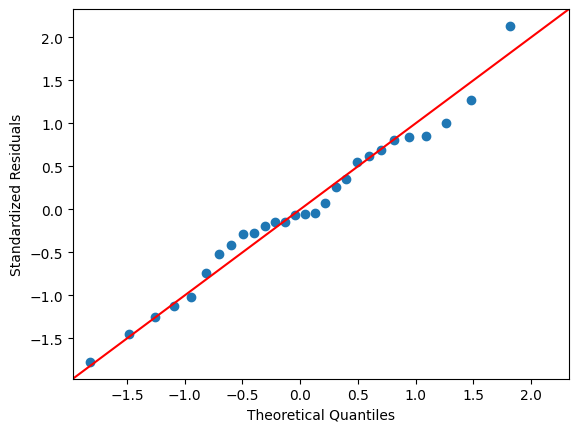

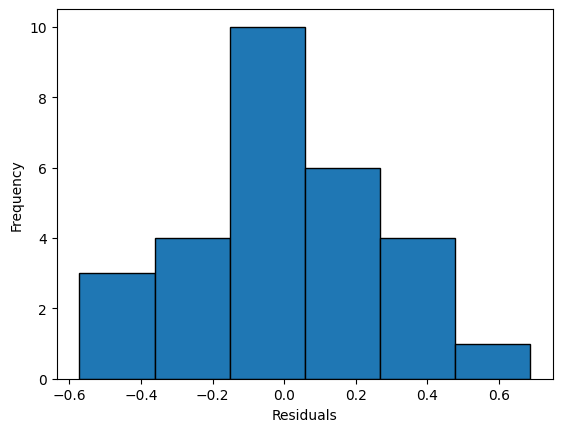

In [26]:
# QQ-plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

## Shapiro-Wilk test

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [27]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9847439527511597 0.9447146058082581


As the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

## Bartlett's test

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [28]:
w, pvalue = stats.bartlett(df['Control'], df['DolMix_1kg'], df['DolMix_2kg'], df['DDT_yBHC'], df['Azodrin'], df['Dimecron_Boom'], df['Dimecron_Knap'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

4.008437288834617 0.6755345550005694


,Parameter,Value
0,Test statistics (T),4.0084
1,Degrees of freedom (Df),6.0000
2,p value,0.6755


As the p value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

## Lavene's test

Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [29]:
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.3810
1,Degrees of freedom (Df),6.0000
2,p value,0.8828


# References

https://www.reneshbedre.com/blog/anova.html
https://nicoleeic.github.io/Brain_and_Code/2019/09/02/ANOVA_new.html

Anova from scratch:
https://gist.github.com/tlinnet/592585a513d1c83b0352